# Run your first Qiskit Serverless workload remotely

<details>
<summary><b>Package versions</b></summary>

The code on this page was developed using the following requirements.
We recommend using these versions or newer.

```
qiskit[all]~=1.3.2
qiskit-ibm-runtime~=0.34.0
qiskit-aer~=0.15.1
qiskit-serverless~=0.18.1
qiskit-ibm-catalog~=0.2
qiskit-addon-sqd~=0.8.1
qiskit-addon-utils~=0.1.0
qiskit-addon-mpf~=0.2.0
qiskit-addon-aqc-tensor~=0.1.2
qiskit-addon-obp~=0.1.0
scipy~=1.15.1
pyscf~=2.8.0; sys.platform != 'win32'
```
</details>

This section explores how to use `qiskit-ibm-catalog` to list programs available in Qiskit Serverless, pass inputs into these programs, run them remotely, check their status, and retrieve results and logs.

Be sure you have authenticated to Qiskit Serverless with your [IBM Quantum account](https://quantum.ibm.com/account) (see [Deploy to IBM Quantum Platform](./serverless-first-program#deploy-to-ibm-quantum-platform) for instructions).

## List programs available

You can use `QiskitServerless.list()` to fetch a list of the available programs to run with Qiskit Serverless. This includes the previously uploaded [`transpile_remote_serverless`](./serverless-first-program).

In [1]:
from qiskit_ibm_catalog import QiskitServerless

serverless = QiskitServerless()
next(
    program
    for program in serverless.list()
    if program.title == "transpile_remote_serverless"
)

QiskitFunction(transpile_remote_serverless)

## Run an uploaded program and pass inputs

First, set up your inputs. Your program has three inputs: `circuits`, `backend`, and `optimization_level`. You can use `random_circuit` to create 30 random circuits:

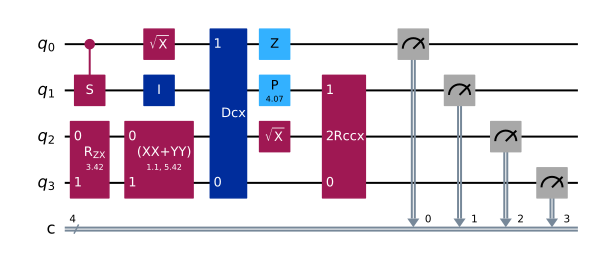

In [2]:
from qiskit.circuit.random import random_circuit

qc_random = [(random_circuit(4, 4, measure=True, seed=i)) for i in range(10)]
qc_random[0].draw(output="mpl", idle_wires=False)

Next, use `QiskitRuntimeService` and `least_busy` to select a `backend`:

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# If you have not previously saved your credentials, follow instructions at
# https://docs.quantum.ibm.com/guides/setup-channel#iqp
# to authenticate with your API token.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print(backend.name)

ibm_kyiv


Set your optimization level:

In [4]:
optimization_level = 3

Select your program with `serverless.load('PROGRAM_NAME')`:

In [5]:
transpile_remote_serverless = serverless.load("transpile_remote_serverless")

Next, pass your inputs and run it in a pythonic fashion as follows:

In [6]:
job = transpile_remote_serverless.run(
    circuits=qc_random,
    backend=backend.name,
    optimization_level=optimization_level,
)

In [7]:
job.job_id

'ec4231cc-a0b2-400b-91f8-dcd2d064821c'

## Check job status

With your Qiskit Serverless `job_id`, you can check the status of running jobs. This includes the following statuses:

- **`QUEUED`**: The remote program is in the Qiskit Serverless queue. The queue priority is currently based on how much you've used Qiskit Serverless
- **`INITIALIZING`**: The remote program is starting; this includes setting up the remote environment and installing dependencies
- **`RUNNING`**: The program is running. At this stage, if you have `print()` outputs in your program, you can retrieve logs using `job.logs()`
- **`DONE`**: The program is complete, and you can retrieve data stored in `save_result()` with `job.results()`

In [8]:
job.status()

'QUEUED'

In [9]:
# This cell is hidden from users, it checks the job status
assert _ in ["QUEUED", "INITIALIZING", "RUNNING", "DONE"]  # noqa: F821

<Admonition type="tip">
Currently, the IBM Quantum workloads table only reflects Qiskit Runtime workloads. Use `job.status()` to see your Qiskit Serverless workload's current status.
</Admonition>

You've successfully run your first Qiskit Serverless program!

## Retrieve logs and results

As mentioned before, once a program is `RUNNING`, you can use `job.logs()` to fetch logs created from `print()` outputs:

In [10]:
logs = job.logs()
print(logs)

No logs yet.


At any time, you can also cancel a job:

In [11]:
job.stop()

'Job has been stopped.'

Once a program is `DONE`, you can use `job.results()` to fetch the result stored in `save_result()`:

In [12]:
# We can't get results from a cancelled job, so we'll fetch a completed one instead
completed_job = next(
    job for job in serverless.jobs() if job.status() == "DONE"
)
completed_job.result()

{'transpiled_circuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7f9a1ff05e50>,
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7f9a1e5cdb90>]}

## List previously run jobs run with Qiskit Serverless

You can use `jobs()` to list all jobs submitted to Qiskit Serverless:

In [13]:
old_jobs = serverless.jobs()
old_jobs

[<Job | ec4231cc-a0b2-400b-91f8-dcd2d064821c>,
 <Job | cf889af4-1eb2-46a2-baa8-2c5c2d7f6b39>,
 <Job | 7864539f-d8d0-4812-ac35-5cd58dcbddba>,
 <Job | eba58ea0-b7cd-46a3-9312-938aed26cf93>,
 <Job | f58a9f0e-f369-4c54-aa54-812ae0d11833>,
 <Job | e8358dd1-6cf2-481e-8d31-5c35edb11ce0>,
 <Job | 8c768a5e-badb-41b6-8dc2-4e9b8d614442>,
 <Job | 6a60cfca-9c42-4d2c-a03c-ead47899a7e2>,
 <Job | 0e2f6f27-7806-4c5e-b3d8-2ed85c926845>,
 <Job | fa0deb5e-1cff-42a5-a0db-7a60e7cedec7>]

## Next steps

<Admonition type="info" title="Recommendations">

- Explore [compute and data management tools](./serverless-manage-resources) available to your program, including parallelization.

</Admonition>